In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


tensorflow的MNIST分成三個部分：

__mnist.train__有55000張圖片

__mnist.test__有10000張

__mnist.validation__有5000張

In [4]:
print(mnist.train.images.shape) # 共有55000張圖片，每張已經攤平成 784*0
print(mnist.train.labels.shape) #每張圖片對應的label已經做完one-hot encoding
print(mnist.validation.images.shape) # 交叉驗證用的資料shape
print(mnist.test.images.shape) # 測試資料的shape

(55000, 784)
(55000, 10)
(5000, 784)
(10000, 784)


視覺化資料

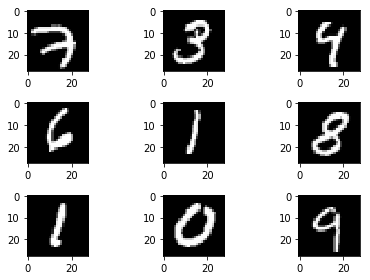

In [6]:
x = mnist.train.images
"""
把訓練資料印出來看一下
"""
%matplotlib inline
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x[i].reshape([28, 28]), cmap='gray', interpolation='none')
plt.tight_layout()

__宣告placeholder__

這邊X宣告成一個2-D tensor，shape是 __[None, 784]__ ，None意思是可以是任意長度

也就是說不管資料最後有幾筆(有幾個row)，每一筆資料(每個row)都是784維的資料


In [12]:
X = tf.placeholder(tf.float32, [None, 784])

ML第一步 - __定義模型__

這邊用單純的softmax regressor作多元分類

記得，模型的參數通常用Variable

W的shape是__[784, 10]__，可以想成到時候每個input x會個別乘上w，也就是要將輸入的矩陣 X=[None, 784]，乘上 W=[784, 10]，最後會得到10個scaler

In [13]:
W = tf.Variable(tf.zeros([784, 10])) # 將輸入的 0 * 784 的矩陣 乘上 784 * 10 的 W 矩陣，可以得到 0 * 10 的 10個 scaler
b = tf.Variable(tf.zeros([10]))

模型使用內建__tf.nn.softmax__層，傳入__WX+b__完成一個softmax regressor

In [14]:
y = tf.nn.softmax(tf.matmul(X, W) + b)

再宣告一個placeholder放真實y

In [15]:
y_true = tf.placeholder(tf.float32, [None, 10])

ML第二步 - __定義Loss Function__

這邊使用cross_entropy，這行可以看做cross_entropy的固定寫法

其中，
- tf.log 會對每個預測值y取log
- tf.reduce\_sum 會將第二個維度的所有值加總起來（reduction\_indices用來指定要加總的維度。記得，第一個維度是空的，y 和 y_ture 的 shape 都是[, 10]）

In [19]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_true * tf.log(y), reduction_indices=[1]))

ML第三步 - __定義尋找最佳Function的方式__

這邊我們使用gradient descent

In [20]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

__以上已完成我們的完整computational graph__

--------------------------------------------------------------------------------------------------------

開啟一個sess，準備開始進行訓練

In [22]:
sess = tf.Session()

記得初始化所有Vatiable

In [21]:
init = tf.global_variables_initializer()

In [23]:
sess.run(init)

這邊補充一下next_batch函式怎麼用

In [24]:
"""
查看一下next_batch函式怎麼使用
"""
print('10筆訓練資料的x')
print(mnist.train.next_batch(10)[0])
print('10筆訓練資料的y')
print(mnist.train.next_batch(10)[1])

10筆訓練資料的x
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
10筆訓練資料的y
[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]]


__進行1000輪訓練__

In [28]:
from time import time

In [29]:
start = time()
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={X: batch_xs, y_true: batch_ys})
end = time()
print('訓練花費', (end-start), '秒')

訓練花費 1.530768871307373 秒


__evaluation__

In [31]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1)) # 注意這邊的 y 和 y_ 都是placeholder
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [33]:
print('Accuracy: ', sess.run(accuracy, feed_dict = {X: mnist.test.images, y_true: mnist.test.labels}))

Accuracy:  0.9224
